## Automobile Terminology: 
- symbolizing: The degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "symboling".  A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

- normalize-losses: its normalized losses in use as compared to other cars

- make: The manufacturer of the car
- fuel-type: 
- aspiration 
- num-of-doors
- body-style
- drive-wheels
- engine-location
- wheel-base
- length
- width
- height 
- curb-weight 
- engine-type 
- num-of-cylinders
- engine-size 
- fuel-system 
- bore
- stroke
- compression-ratio 
- horsepower 
- peak-rpm 
- city-mpg
- highway-mpg
- price 

In [553]:
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 

In [554]:
#creating dataframe/ calling in data

autodf = pd.read_csv("../dataset/imports-85.data", header=None)

In [555]:
autodf.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [556]:
#original df had no column names, refrenced documentation to label columns 

#autodf.columns = ['symbolizing', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'] 

In [557]:
#renaming with dictionary - this did not work for me, I am not sure why but my columns were not renamed
#autodf.rename(columns={'0':'symbolizing', '1':'normalized-losses', '2':'make', '3':'fuel-type', '4':'aspiration', '5':'num-of-doors', '6':'body-style', '7':'drive-wheels', '8':'engine-location', '9':'wheel-base', '10':'length', '11':'width', '12':'height', '13':'curb-weight', '14':'engine-type', '15':'num-of-cylinders', '16':'engine-size', '17':'fuel-system', '18':'bore', '19':'stroke', '20':'compression-ratio', '21':'horsepower', '22':'peak-rpm', '23':'city-mpg', '24':'highway-mpg', '25':'price'}, inplace=True)

autodf.rename(columns={0:'symbolizing', 1:'normalized-losses', 2:'make', 3:'fuel-type', 4:'aspiration', 5:'num-of-doors', 6:'body-style', 7:'drive-wheels', 8:'engine-location', 9:'wheel-base', 10:'length', 11:'width', 12:'height', 13:'curb-weight', 14:'engine-type', 15:'num-of-cylinders', 16:'engine-size', 17:'fuel-system', 18:'bore', 19:'stroke', 20:'compression-ratio', 21:'horsepower', 22:'peak-rpm', 23:'city-mpg', 24:'highway-mpg', 25:'price'}, inplace=True)

In [558]:
autodf.head()

,symbolizing,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [559]:
#providing stats for all columns with numerical values 

autodf.describe()

,symbolizing,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [560]:
autodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symbolizing        205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [561]:
autodf.replace('?', pd.NA, inplace=True)

In [562]:
autodf.isnull().sum()

symbolizing           0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [563]:
#dont need this one anymore 
# autodf['price'] = autodf['price'].replace('?', np.nan)

In [564]:
autodf['price'].replace(np.nan, 13207, inplace=True)

In [565]:
autodf['price'] = autodf['price'].astype('int64')

In [566]:
autodf['price'].mean()

13207.126829268293

## Univariate Analysis:  
- Generating visualizations for each of the numeric variables to get an idea of outliers and distributions in our automobile dataset. 

- Additionally, also visualizing the frequency-count of qualitative variables to get an understanding of the composition of our dataset.

In [567]:
autodf["price"].isnull().sum()

0

In [568]:
autodf["price"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: price
Non-Null Count  Dtype
--------------  -----
205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


<Axes: xlabel='price', ylabel='Count'>

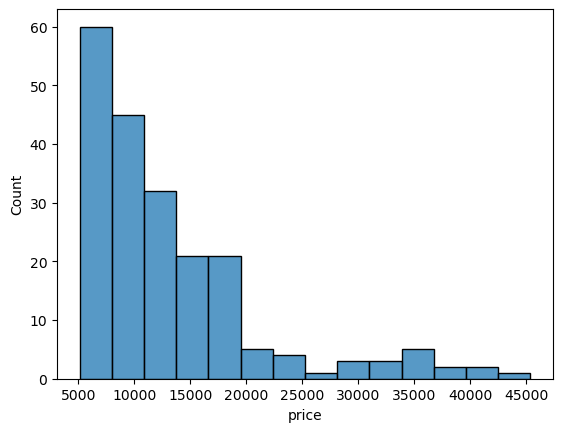

In [569]:
#autodf["price"] = pd.to_numeric(autodf["price"], errors="coerce")

sns.histplot(autodf, x="price")

In [570]:
autodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symbolizing        205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

<Axes: xlabel='engine-size', ylabel='Count'>

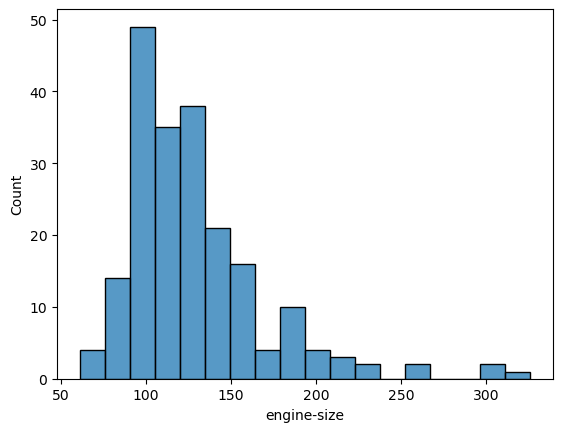

In [571]:
sns.histplot(autodf, x="engine-size")

<Axes: xlabel='symbolizing', ylabel='Count'>

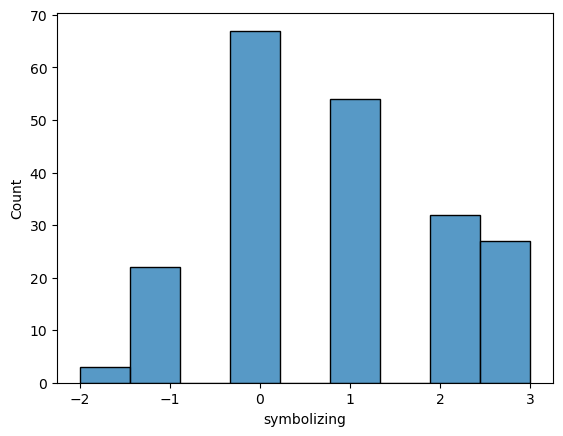

In [572]:
sns.histplot(autodf, x="symbolizing", )

<Axes: xlabel='highway-mpg', ylabel='Count'>

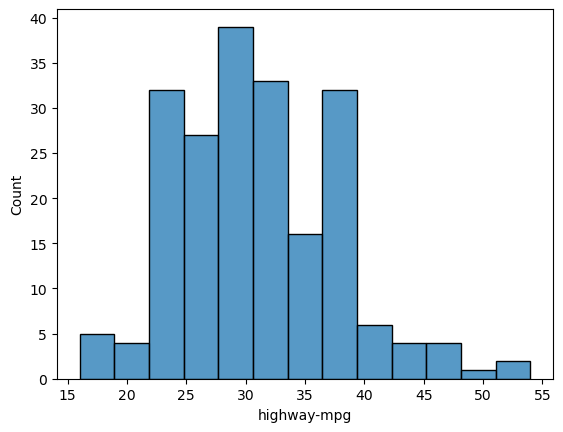

In [573]:
sns.histplot(autodf, x='highway-mpg')

In [574]:
make_count = autodf.value_counts(subset = "make")
make_count

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

<Axes: xlabel='make'>

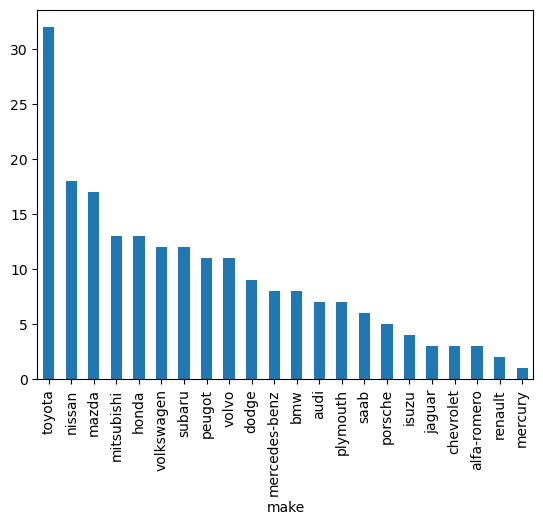

In [575]:
make_count.plot.bar()

In [576]:
fuel_count = autodf["fuel-type"].value_counts()
fuel_count

fuel-type
gas       185
diesel     20
Name: count, dtype: int64

<Axes: xlabel='fuel-type'>

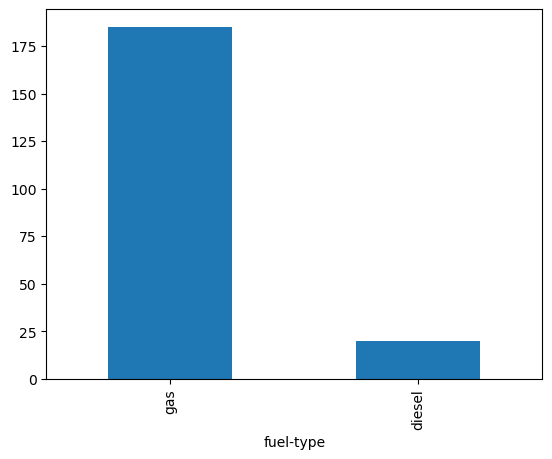

In [577]:
fuel_count.plot.bar()

In [578]:
style_count = autodf["body-style"].value_counts()
style_count

body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

<Axes: xlabel='body-style'>

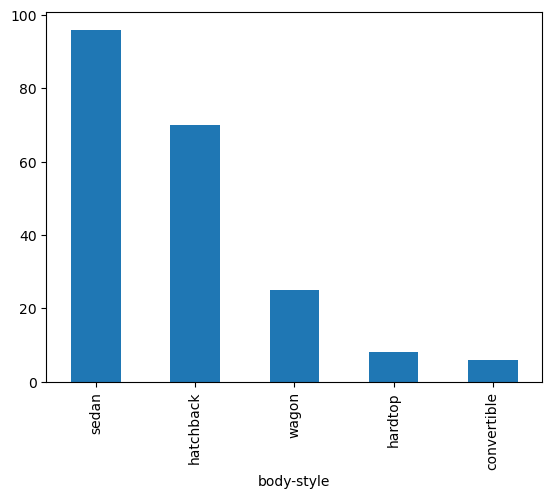

In [579]:
style_count.plot.bar()

In [580]:
drive_count = autodf["drive-wheels"].value_counts()
drive_count

drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

<Axes: xlabel='drive-wheels'>

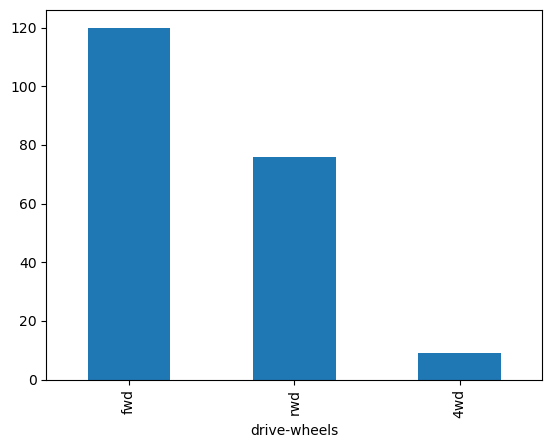

In [581]:
drive_count.plot.bar()

In [582]:
engloc_count = autodf["engine-location"].value_counts()
engloc_count

engine-location
front    202
rear       3
Name: count, dtype: int64

<Axes: xlabel='engine-location'>

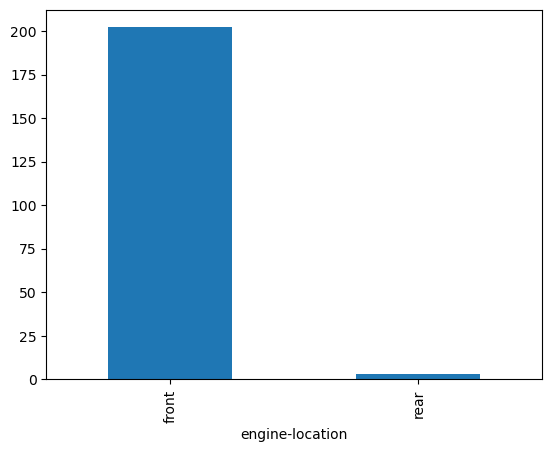

In [583]:
engloc_count.plot.bar()

In [584]:
cylinders_count = autodf["num-of-cylinders"].value_counts()
cylinders_count

num-of-cylinders
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

<Axes: xlabel='num-of-cylinders'>

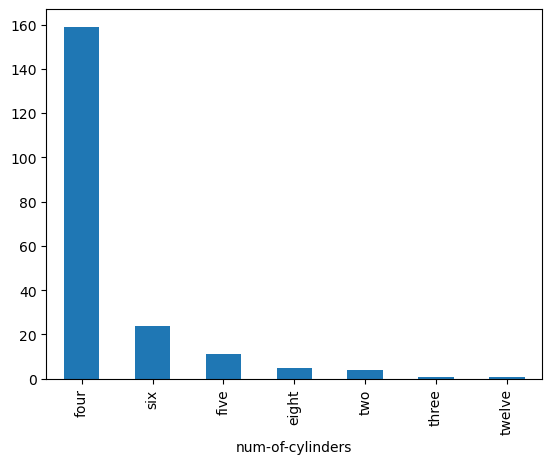

In [585]:
cylinders_count.plot.bar()

# Bivariate Analysis 

- Generating visualizatons for relationships between multiple numeric variables to get an idea of patterns and clusters that might be present in our dataset.

<Axes: xlabel='fuel-type', ylabel='symbolizing'>

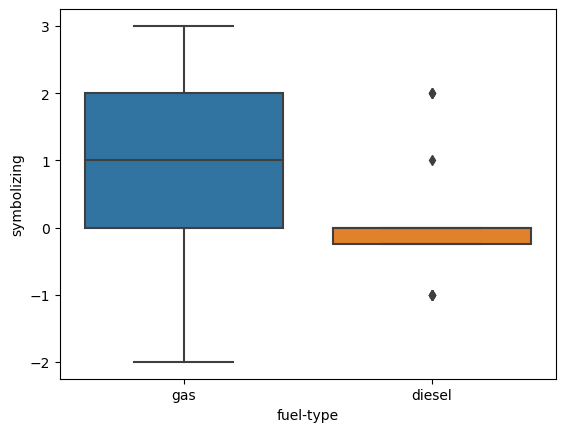

In [586]:
sns.boxplot(autodf, x="fuel-type", y="symbolizing" )

<Axes: xlabel='body-style', ylabel='price'>

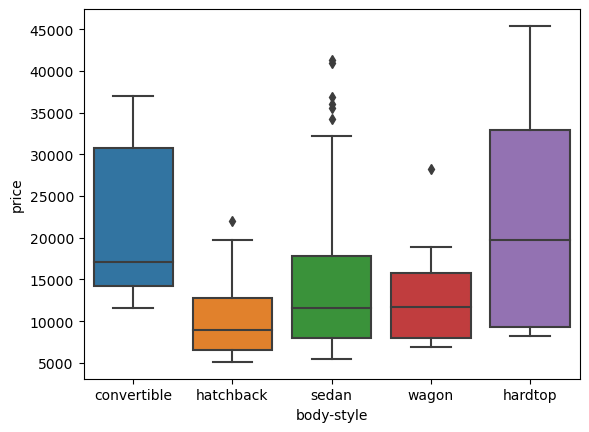

In [589]:
sns.boxplot(autodf, x='body-style', y='price')

<Axes: xlabel='body-style', ylabel='symbolizing'>

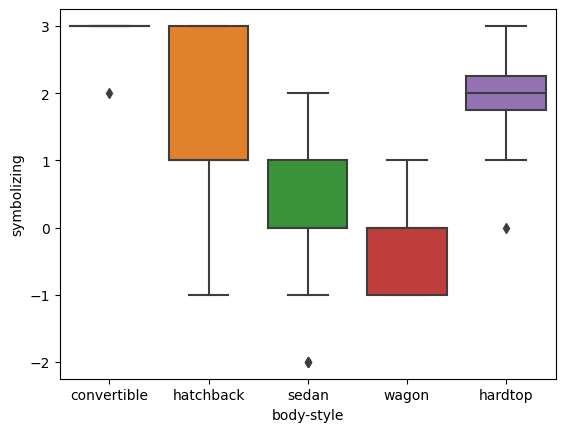

In [590]:
sns.boxplot(autodf, x='body-style', y='symbolizing')

<Axes: xlabel='num-of-cylinders', ylabel='price'>

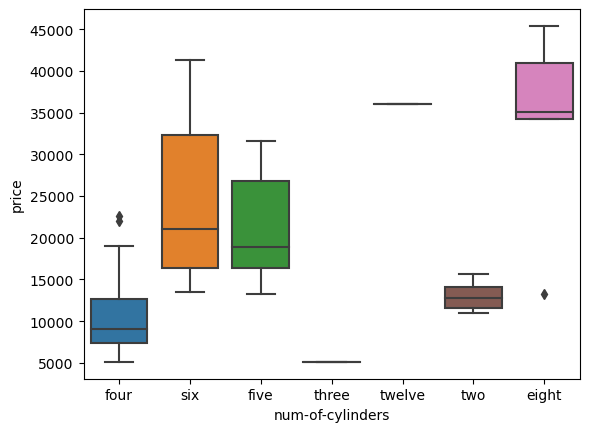

In [591]:
sns.boxplot(autodf, x='num-of-cylinders', y='price')

<Axes: xlabel='symbolizing', ylabel='price'>

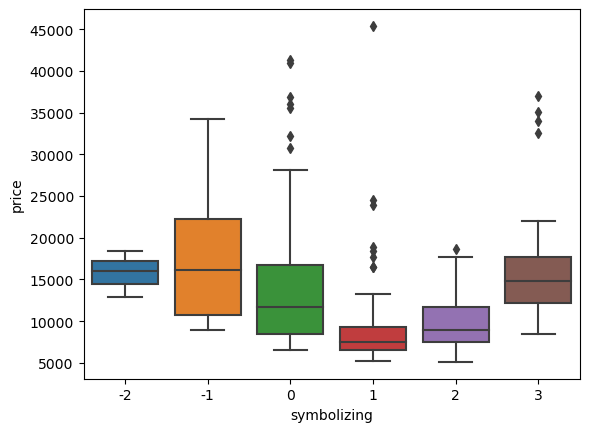

In [592]:
sns.boxplot(autodf, x='symbolizing', y='price')

In [588]:
sd = sns.PairGrid(autodf)
sd.map_upper(sns.scatterplot)
sd.map_lower(sns.kdeplot)
sd.map_diag(sns.histplot)

TypeError: boolean value of NA is ambiguous